# Global Shark Attack Incidents
## Heatmap

This notebook leverages a dataset containing records of shark attack incidents worldwide to explore and visualize the frequency of these occurrences. By analyzing this data, we gain insights into the geographic distribution of shark attacks, shedding light on areas where such incidents are more prevalent. Towards the end of the notebook, a heat map is presented, providing a visual representation of the regions most affected by shark attacks. 

## Shark data (import and visualization)

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

""" 
Setting display.max_columns to None ensures that Pandas will display all columns of a DataFrame, 
regardless of its size. This can be useful when working with datasets that have a large number of columns, 
as it allows you to see all the available data without truncation.
It improves the readability and usability of the DataFrame, especially when exploring or analyzing 
the data interactively.
"""
pd.set_option("display.max_columns",None)

"""
The low_memory=False parameter is optional and was set to False.
When set to False, it instructs pandas not to attempt to infer the data type of each column automatically,
which can save memory in cases where the file has many columns with mixed data types or large amounts of data.
This can be useful when working with large files or varied data types.
However, setting low_memory=False may consume more RAM during the file reading process,
we're reading the dataset.
"""
df = pd.read_csv("./inputs/sharks/GSAF5.xls.csv", low_memory=False)
print(df.columns)

df = df[['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Unnamed: 9', 'Age', 'Time','Species ','Fatal (Y/N)','Injury']]


"""
It's not strictly necessary to maintain the original order of columns when renaming them. 
However, doing so can enhance clarity, consistency, and compatibility with existing code.
"""
# Renaming column ('Unnamed: 9' to 'Victim\'s Gender')
df.columns = ['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Victim\'s Gender', 'Age', 'Time','Species','Fatal', 'Injury']

# Amount of "(lines, columns)" respectively
print(df.shape)

df.head()

Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=257)
(6462, 15)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Victim's Gender,Age,Time,Species,Fatal,Injury
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,NaN,09h40,Tiger shark,N,"No injury, but paddleboard bitten"
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,24,NaN,NaN,N,PROVOKED INCIDENT Scratches to left wrist
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,59,08h00,"""A small shark""",N,Laceration ot left ankle and foot
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,13,20h30,Broadnose seven gill shark?,N,Minor injury to lower leg
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,26,14h33,NaN,N,Lacerations to foot


In [95]:
"""
This code is using the .isnull () method of the DataFrame to check null values in each column
and then it is adding the number of null values in each of these columns, to obtain its total.
"""
df.isnull().sum()

Case Number           2
Date                  1
Year                  3
Type                  5
Country              51
Area                463
Location            545
Activity            552
Name                215
Victim's Gender    6434
Age                2871
Time               3392
Species            2924
Fatal               547
Injury               29
dtype: int64

In [96]:
"""
The nunique() function in Pandas is used to count the number of unique values in a specific column of a DataFrame.
Applying this function to the 'Country' column provides valuable insight into the shark incidents,
highlighting the global nature of shark attacks documented in the dataset. 
This information is crucial for understanding the geographical distribution and scope of the dataset.
"""
df['Country'].nunique()

205

### Counting the occurrences of shark attacks by country

In [97]:
"""
The "value_counts()" function shows the occurrences of shark attacks by country.
The "reset_index()" method converts the results into a DataFrame.
Finally, "head(20)", wich is also a method exhibits the top twenty countries with the highest
number of occurrences, offering a quick view of the most affected countries by shark attacks,
Brazil (the country where I live) is in the seventh position.
"""
# Selecting the column 'Country' from the DataFrame and adding the function `value_counts()`
# in order to create the 'count' column, so that we can find out the number of occurrences, respectively.
df_country = df['Country'].value_counts()

# Counting the occurrences of shark attacks by country and storing the result in a DataFrame
df_country = df['Country'].value_counts().reset_index()

# Displaying the top 20 countries with the highest number of shark attack occurrences
df_country.head(20)

,Country,count
0,USA,2310
1,AUSTRALIA,1374
2,SOUTH AFRICA,585
3,NEW ZEALAND,135
4,PAPUA NEW GUINEA,135
5,BAHAMAS,115
6,BRAZIL,113
7,MEXICO,95
8,ITALY,71
9,FIJI,62


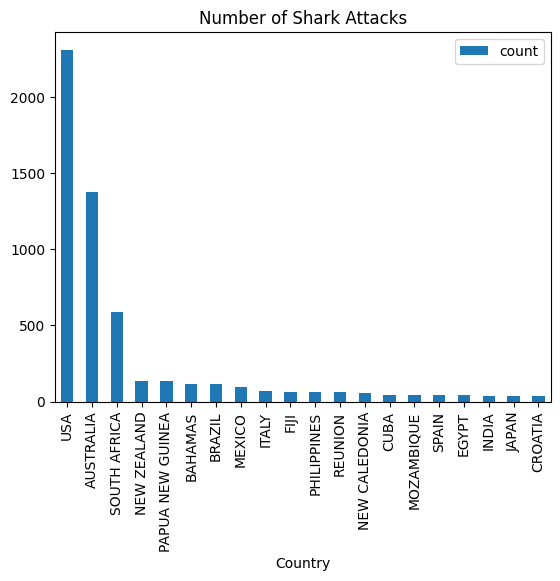

In [98]:
# Plotting a bar graph that shows the 20 countries with the most occurrences of shark attacks
df_country.head(20).plot.bar('Country')

# Adding a title to the graph
plt.title("Number of Shark Attacks")

# Displaying the graph
plt.show()

As a percentage of the total, USA is 36% and Australia is 21%, so these two countries account for half of the total.

In [99]:
# Calculate the rate of shark attack occurrences for each country relative to the total occurrences worldwide
# by dividing the number of shark attack occurrences for each country by the total occurrences of all countries.
# Add a new column 'rate' to the DataFrame df_country to store these rates.
df_country['rate'] = df_country.iloc[:,1] / df_country['count'].sum()

# Display the first five rows of the DataFrame df_country, including the new 'rate' column.
df_country.head(5)

,Country,count,rate
0,USA,2310,0.360318
1,AUSTRALIA,1374,0.214319
2,SOUTH AFRICA,585,0.091249
3,NEW ZEALAND,135,0.021058
4,PAPUA NEW GUINEA,135,0.021058


In [100]:
# The count of shark attacks is stored in the column 'Type'.
# The reset_index() method is used to reset the index of the resulting DataFrame, ensuring that 
# the row labels are sequential integers, since that facilitates the access to specific rows and enhances
# compatibility with various data manipulation operations in many libraries. 
df_Area = df[['Country','Area','Type']].groupby(['Country','Area']).count().reset_index().sort_values('Type',ascending=False)

df_Area.head(20)

,Country,Area,Type
787,USA,Florida,1076
11,AUSTRALIA,New South Wales,498
14,AUSTRALIA,Queensland,325
790,USA,Hawaii,312
782,USA,California,294
679,SOUTH AFRICA,KwaZulu-Natal,215
21,AUSTRALIA,Western Australia,197
683,SOUTH AFRICA,Western Cape Province,195
677,SOUTH AFRICA,Eastern Cape Province,165
812,USA,South Carolina,162


# Geolocation Data (Importing and Processing)

In [101]:
# Opening the dataset [Geolocation Data](https://www.kaggle.com/datasets/liewyousheng/geolocation/data)
# and reading the 'inputs/geolocation/cities.csv' file in order to obtain a better parameter in geolocation
# and cross with the data from the Shark dataset.
place_data = pd.read_csv('./inputs/geolocation/cities.csv')

In [102]:
# Selecting only the columns 'state_name', 'country_name', 'latitude', and 'longitude' from the DataFrame place_data
# and storing the result back into the variable place_data.
place_data = place_data[['state_name','country_name','latitude','longitude']]

# Cleaning the data by removing duplicate rows based on the combination of 'state_name' and 'country_name'
# subset parameter specifies the columns to consider when identifying duplicates.
# In this case, we want to drop rows where both 'state_name' and 'country_name' are the same.
place_data = place_data.drop_duplicates(subset=['state_name','country_name'])

In [103]:
# Manipulating string data in the 'state_name' column of the 'place_data' DataFrame:
# 1. Converting all letters in the 'state_name' column to lowercase using the str.lower() method.
place_data['state_name'] = place_data['state_name'].str.lower()

# 2. Removing all whitespace characters (' ') from the 'state_name' column using the str.replace() method.
# This step ensures consistency in string formatting and removes unnecessary whitespace.
place_data['state_name'] = place_data['state_name'].str.replace(' ', '')

place_data.head(10)

,state_name,country_name,latitude,longitude
0,badakhshan,Afghanistan,36.68333,71.53333
6,badghis,Afghanistan,35.73062,63.78264
8,baghlan,Afghanistan,36.13068,68.70829
12,balkh,Afghanistan,36.75635,66.89720
18,bamyan,Afghanistan,34.82156,67.82734
20,daykundi,Afghanistan,33.76329,66.07617
21,farah,Afghanistan,32.37451,62.11638
22,faryab,Afghanistan,36.95293,65.12376
24,ghazni,Afghanistan,33.55391,68.42096
25,ghōr,Afghanistan,34.51952,65.25093


In [104]:
"""
The shape attribute of a DataFrame or a NumPy array returns a tuple representing the dimensions of the 
data structure. In the specific case of place_data.shape, it returns 
a tuple with two elements: the first element represents the number of rows (or entries) 
in the DataFrame or array, and the second element represents the number of columns (or features) 
in the DataFrame or array. Therefore, when calling place_data.shape, you will obtain the 
total number of entries (or records) and the total number of features (or variables) in the DataFrame place_data. 
This is useful for understanding the data structure and determining its dimensions 
before performing additional operations or analyses.
"""
place_data.shape

(3429, 4)

# Data Merge

In [105]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Victim's Gender,Age,Time,Species,Fatal,Injury
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,NaN,09h40,Tiger shark,N,"No injury, but paddleboard bitten"
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,24,NaN,NaN,N,PROVOKED INCIDENT Scratches to left wrist
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,59,08h00,"""A small shark""",N,Laceration ot left ankle and foot
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,13,20h30,Broadnose seven gill shark?,N,Minor injury to lower leg
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,26,14h33,NaN,N,Lacerations to foot


In [106]:
# Create a new DataFrame containing only the 'Country' and 'Area' columns from the original DataFrame
df_only_Area = df[['Country', 'Area']]

# Rename the 'Area' column to 'state_name' in order to reflect its content more accurately
df_only_Area.columns = ['Country', 'state_name']

# Convert the values in the 'state_name' column to lowercase
df_only_Area['state_name'] = df_only_Area['state_name'].str.lower()

# Remove whitespace characters from the values in the 'state_name' column
df_only_Area['state_name'] = df_only_Area['state_name'].str.replace(' ', '')

# Display the first few rows of the preprocessed DataFrame
df_only_Area.head()

/tmp/ipykernel_58714/4293545080.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_Area['state_name'] = df_only_Area['state_name'].str.lower()
/tmp/ipykernel_58714/4293545080.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_Area['state_name'] = df_only_Area['state_name'].str.replace(' ', '')


,Country,state_name
0,USA,maui
1,BAHAMAS,exumas
2,AUSTRALIA,newsouthwales
3,NEW ZEALAND,southland
4,USA,northcarolina


In [107]:
df_only_Area.isnull().sum()

Country        51
state_name    463
dtype: int64

In [108]:
# Perform a left join operation to merge the DataFrame df_only_Area (left) with the place_data DataFrame (right) 
# on the 'state_name' column. This operation is useful when we want to retain all the data from the left DataFrame 
# (df_only_Area) and only add additional information from the right DataFrame (place_data) where available.
df_join = pd.merge(df_only_Area, place_data, how='left', on='state_name')

# Display the shape of the resulting DataFrame to check the number of rows and columns
print(df_join.shape)

# Display the first few rows of the merged DataFrame
df_join.head()

(6704, 5)


,Country,state_name,country_name,latitude,longitude
0,USA,maui,NaN,NaN,NaN
1,BAHAMAS,exumas,NaN,NaN,NaN
2,AUSTRALIA,newsouthwales,Australia,-33.87010,150.86119
3,NEW ZEALAND,southland,NaN,NaN,NaN
4,USA,northcarolina,United States,35.13155,-79.42948


Since the two sets of data have different purposes, there are null data that have not been combined well.
In this case, all nulls will be excluded.

In [109]:
# Check for missing values in the merged DataFrame df_join
df_join.isnull().sum()

Country           51
state_name       463
country_name    2152
latitude        2152
longitude       2152
dtype: int64

In [110]:
# Display the rows where the 'country_name' column is null (missing)
df_join[pd.isnull(df_join.country_name)].head()

,Country,state_name,country_name,latitude,longitude
0,USA,maui,NaN,NaN,NaN
1,BAHAMAS,exumas,NaN,NaN,NaN
3,NEW ZEALAND,southland,NaN,NaN,NaN
5,THAILAND,phangngaprovince,NaN,NaN,NaN
8,NEW CALEDONIA,NaN,NaN,NaN,NaN


In [111]:
"""
# Drop rows with missing values and specific columns from the DataFrame df_join.
# The axis=0 parameter indicates that rows will be dropped.
# The .drop() function is used to remove rows or columns from a DataFrame.
# Here, we remove rows containing missing values using dropna(), and specific columns 
# ('Country', 'country_name', 'state_name') using the 'axis=1' parameter.
"""
df_join = df_join.dropna(axis=0).drop(['Country','country_name','state_name'], axis=1)

# Check for missing values after dropping rows 
print(df_join.isnull().sum())

# Display the shape of the DataFrame after dropping rows and columns
df_join.shape

latitude     0
longitude    0
dtype: int64


(4552, 2)

In [112]:
# This displays the first few rows of the DataFrame, allowing the data to be inspected 
# in order to confirm that the preprocessing steps have been applied correctly.
df_join.head()

,latitude,longitude
2,-33.87010,150.86119
4,35.13155,-79.42948
6,-27.58333,153.03333
7,-33.66364,115.25635
9,-33.66364,115.25635


# Heat Map Visualization

In [113]:
# This command instaled the Folium package, which is used for visualizing geospatial data with interactive maps. 
# Once installed, I was able to import and use Folium in the Jupyter notebook.
!pip install folium

In [114]:
# Convert DataFrame values to a list format
df_list = df_join.values.tolist()

# Import the Folium library for creating interactive maps
import folium
from folium.plugins import HeatMap

# Create a base map centered at latitude 10 and longitude -20, with a zoom level of 3
map = folium.Map(location=[10, -20], zoom_start=3)

# Create a HeatMap layer using the list of values converted from the DataFrame
# with a radius of 7 and a blur factor of 5, and add it to the map
HeatMap(df_list, radius=7, blur=5).add_to(map)

# Display the map
map

Successfully visualized heatmap!

We can see that there are incidents with sharks in various locations in the United States. However, it's important to note that the latitude and longitude data may not be perfectly accurate, resulting in some coloration even on land due to imprecise geolocation data. Nevertheless, exploring this heatmap can still provide valuable insights into areas where shark incidents are more prevalent.

Feel free to interact with the map by moving around the region and zooming in to explore specific areas. This visualization can be useful for gaining awareness and understanding potential risk areas, allowing you to make informed decisions and take precautions when traveling or engaging in activities near coastal areas.

# ML

In [115]:
# Importing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#random florest (the best option?)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [116]:
#df = pd.read_csv("/kaggle/input/global-shark-attack-incidents/GSAF5.xls.csv",low_memory=False)
print(df.info)

# df = df[['Case Number','Time', 'Date', 'Year', 'Type', 'Country','Fatal','Injury', 'Area','Location', 'Activity', 'Name', 'Victim\'s Gender', 'Age','Species']]
df = df[['Case Number','Time', 'Date', 'Year', 'Type', 'Country','Fatal','Injury', 'Area','Location', 'Activity', 'Name', 'Age','Species']]
# df_ml = df[['Time','Country','Location','Fatal','Injury','Age','Species',Activity','Victim\'s Gender']]

<bound method DataFrame.info of        Case Number                  Date    Year        Type  \
0       2020.02.05           05-Feb-2020  2020.0  Unprovoked   
1     2020.01.30.R  Reported 30-Jan-2020  2020.0    Provoked   
2       2020.01.17           17-Jan-2020  2020.0  Unprovoked   
3       2020.01.16           16-Jan-2020  2020.0  Unprovoked   
4       2020.01.13           13-Jan-2020  2020.0  Unprovoked   
...            ...                   ...     ...         ...   
6457       ND.0005           Before 1903     0.0  Unprovoked   
6458       ND.0004           Before 1903     0.0  Unprovoked   
6459       ND.0003             1900-1905     0.0  Unprovoked   
6460       ND.0002             1883-1889     0.0  Unprovoked   
6461       ND.0001             1845-1853     0.0  Unprovoked   

                 Country               Area  \
0                    USA               Maui   
1                BAHAMAS             Exumas   
2              AUSTRALIA    New South Wales   
3          

### Analyze

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  6460 non-null   object 
 1   Time         3070 non-null   object 
 2   Date         6461 non-null   object 
 3   Year         6459 non-null   float64
 4   Type         6457 non-null   object 
 5   Country      6411 non-null   object 
 6   Fatal        5915 non-null   object 
 7   Injury       6433 non-null   object 
 8   Area         5999 non-null   object 
 9   Location     5917 non-null   object 
 10  Activity     5910 non-null   object 
 11  Name         6247 non-null   object 
 12  Age          3591 non-null   object 
 13  Species      3538 non-null   object 
dtypes: float64(1), object(13)
memory usage: 706.9+ KB


In [118]:
df.describe()

,Year
count,6459.000000
mean,1929.619446
std,278.316340
min,0.000000
25%,1943.000000
50%,1980.000000
75%,2006.000000
max,3019.000000


## Cleaning

Normalizing / Nan

In [119]:
import pandas as pd

# Remove irrelevant columns
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

# Check NaNs
print("\nNumber of NaNs before treatment:\n\n", df.isna().sum())

# Handle NaNs
# df = df.dropna(subset=['Time','Country','Location','Fatal','Injury','Age','Activity','Species','Victim\'s Gender'])
df = df.dropna(subset=['Time','Country','Location','Fatal','Injury','Age','Activity','Species'])

# Check again
print("\nNumber of NaNs after treatment:\n\n", df.isna().sum())

# Show the cleaned DataFrame
print(df)


Number of NaNs before treatment:

 Case Number       2
Time           3392
Date              1
Year              3
Type              5
Country          51
Fatal           547
Injury           29
Area            463
Location        545
Activity        552
Name            215
Age            2871
Species        2924
dtype: int64

Number of NaNs after treatment:

 Case Number     0
Time            0
Date            0
Year            0
Type            0
Country         0
Fatal           0
Injury          0
Area           15
Location        0
Activity        0
Name            1
Age             0
Species         0
dtype: int64
     Case Number          Time         Date    Year        Type      Country  \
2     2020.01.17         08h00  17-Jan-2020  2020.0  Unprovoked    AUSTRALIA   
3     2020.01.16         20h30  16-Jan-2020  2020.0  Unprovoked  NEW ZEALAND   
6     2020.01.07         17h30  07-Jan-2020  2020.0  Unprovoked    AUSTRALIA   
7     2020.01.05         13h00  05-Jan-2020  2020.0

Currently it is possible to visualize shark encounters, not shark attacks. 

In which period people are attacked the most? 

In [120]:
# Function to categorize time
def categorize_time(time):
    if pd.isnull(time) or time.strip() == '':
        return "Unknown"
    
    time = time.strip().lower()
    
    # Direct categories
    if "morning" in time:
        return "Morning"
    elif "afternoon" in time or "pm" in time:
        return "Afternoon"
    elif "evening" in time or "night" in time:
        return "Evening"
    elif "early morning" in time:
        return "Morning"
    elif "late afternoon" in time:
        return "Afternoon"
    
    # Specific time conversion
    try:
        time = time.replace('h', ':').replace('H', ':')
        hour = int(time.split(':')[0])
        if 0 <= hour < 12:
            return "Morning"
        elif 12 <= hour < 18:
            return "Afternoon"
        else:
            return "Evening"
    except ValueError:
        return "Unknown"

# Apply the categorization function
df['Time'] = df['Time'].apply(categorize_time)

# Fill remaining missing values with 'Unknown'
df['Time'] = df['Time'].fillna('Unknown')
print(df['Time'])

2         Morning
3         Evening
6       Afternoon
7       Afternoon
10      Afternoon
          ...    
5974    Afternoon
6082      Unknown
6402    Afternoon
6403    Afternoon
6425    Afternoon
Name: Time, Length: 1488, dtype: object


In [121]:
# Visualize all entries in the 'Time' column
print("\nCount of all values in the 'Time' column:")
print(df['Time'])

# Filter and visualize only the entries that are not 'Unknown' - checking the cleaning
non_unknown_times = df[df['Time'] == 'Unknown']
print("\nEntries in the 'Time' column that are not 'Unknown':")
print(non_unknown_times['Time'].value_counts())
print(non_unknown_times[['Time']])


Count of all values in the 'Time' column:
2         Morning
3         Evening
6       Afternoon
7       Afternoon
10      Afternoon
          ...    
5974    Afternoon
6082      Unknown
6402    Afternoon
6403    Afternoon
6425    Afternoon
Name: Time, Length: 1488, dtype: object

Entries in the 'Time' column that are not 'Unknown':
Time
Unknown    39
Name: count, dtype: int64
         Time
117   Unknown
292   Unknown
397   Unknown
1076  Unknown
1270  Unknown
1312  Unknown
1375  Unknown
1460  Unknown
1575  Unknown
1872  Unknown
1885  Unknown
1945  Unknown
1950  Unknown
1952  Unknown
1958  Unknown
2043  Unknown
2091  Unknown
2097  Unknown
2414  Unknown
2651  Unknown
2672  Unknown
2712  Unknown
2753  Unknown
2865  Unknown
2984  Unknown
3095  Unknown
3166  Unknown
3595  Unknown
3714  Unknown
3715  Unknown
3734  Unknown
3951  Unknown
4441  Unknown
4553  Unknown
4717  Unknown
4728  Unknown
5158  Unknown
5383  Unknown
6082  Unknown


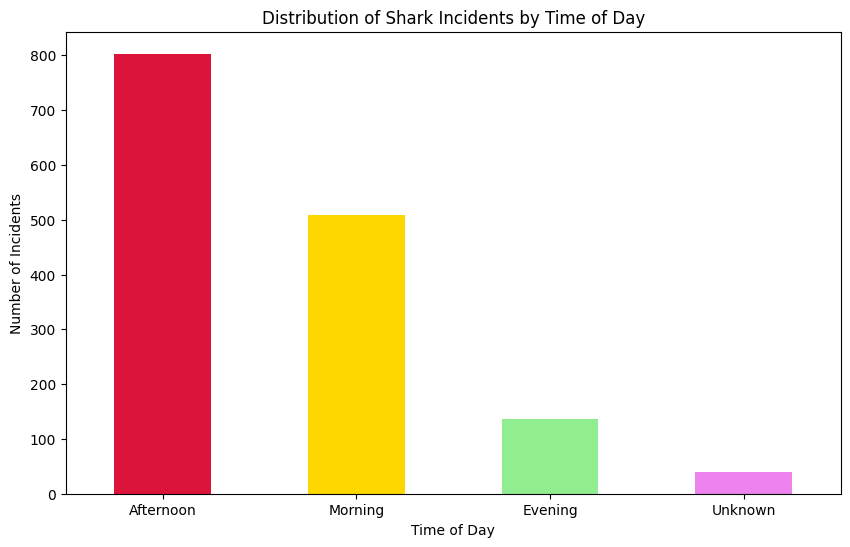

In [122]:
# Plot bar chart to visualize the distribution of shark attacks over time
time_counts = df['Time'].value_counts()

plt.figure(figsize=(10, 6))
time_counts.plot(kind='bar', color=['crimson', 'gold', 'lightgreen', 'violet'])
plt.title('Distribution of Shark Incidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.show()

# Why Do Shark Attacks Occur More in the Afternoon?

We observe that shark attacks are more common in the afternoon due to a blend of human activity, shark behavior, and environmental factors.

## Human Activity
- **Peak Beach Hours**: In the afternoon, there is a significant increase in beachgoers participating in swimming, surfing, and other water activities. This heightened human presence in the water elevates the likelihood of encounters with sharks.
- **Surfing Patterns**: Surfers, who are frequently attacked, often prefer the afternoon for better wave conditions, leading them to spend more time in the water and becoming more susceptible to shark encounters.

## Shark Behavior
- **Feeding Times**: Sharks are generally more active in their feeding during dawn and dusk, coinciding with peak human activity in the water during these times.
- **Prey Movement**: The movement of prey fish closer to shore in the afternoon draws sharks nearer to coastal areas, increasing the chances of shark-human interactions.

## Environmental Factors
- **Water Conditions**: Warmer and clearer water conditions in the afternoon attract more marine life, including sharks, thus heightening the potential for shark attacks.

Understanding these patterns can help us develop strategies to reduce the risk of shark attacks by avoiding peak shark activity times and raising awareness among beachgoers.

In [123]:
# Understanding the Age variable
print(df['Age'])

2             59
3             13
6              7
7             57
10           30s
          ...   
5974          12
6082          35
6402           6
6403          16
6425    13 or 14
Name: Age, Length: 1488, dtype: object


In [124]:
# Cleaning the Age variable
# Function to standardize Age
def standardize_age_towards_ranges(age):
    try:
        age = int(age)
        
        if age < 10:
            return "<10"
        
        if age < 20:
            return "10-19"
        
        if age < 30:
            return "20-29"
        
        if age < 40:
            return "30-39"
        
        if age < 50:
            return "40-49"
        
        if age < 60:
            return "50-59"
        
        return ">60"

    except ValueError:
        return "Unknown"

# Apply the categorization function
df['Age'] = df['Age'].apply(standardize_age_towards_ranges)

# Fill remaining missing values with 'Unknown'
df['Age'] = df['Age'].fillna('Unknown')
df['Age']

2         50-59
3         10-19
6           <10
7         50-59
10      Unknown
         ...   
5974      10-19
6082      30-39
6402        <10
6403      10-19
6425    Unknown
Name: Age, Length: 1488, dtype: object

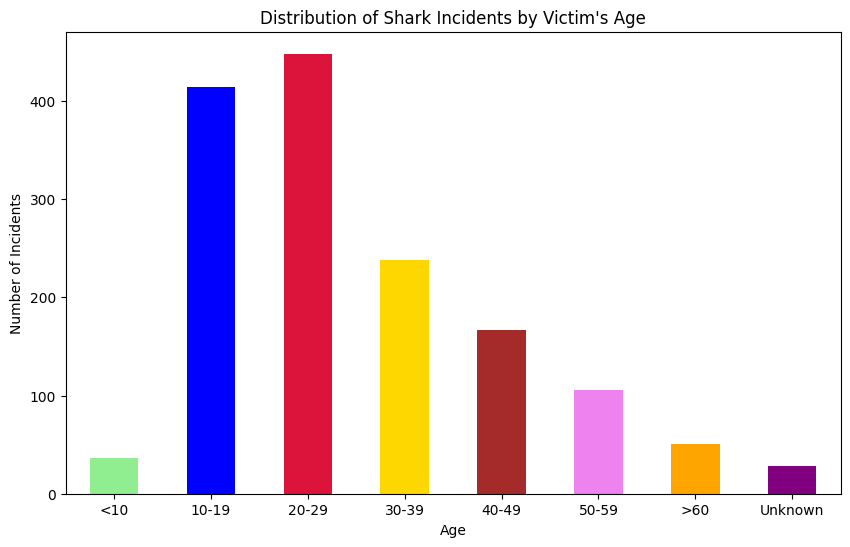

In [132]:
# Plot bar chart to visualize the distribution of shark attacks by victim's age
time_counts = df['Age'].value_counts()

plt.figure(figsize=(10, 6))
# time_counts.plot(kind='bar', color=['crimson', 'gold', 'lightgreen', 'violet'])
ages_order = ["<10", "10-19", "20-29", "30-39", "40-49", "50-59", ">60", "Unknown"]
# time_counts.loc[ages_order].plot(kind='bar', color=['crimson', 'gold', 'lightgreen', 'violet', 'brown', 'blue', 'orange', 'purple'])
time_counts.loc[ages_order].plot(kind='bar', color=['lightgreen', 'blue', 'crimson', 'gold', 'brown', 'violet', 'orange', 'purple'])
plt.title('Distribution of Shark Incidents by Victim\'s Age')
plt.xlabel('Age')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.show()